# Exam Introduction to Data Science, January 2017


---

# Question 1 (20).

- (5) Is an R vector a mutable, or an immutable type? How can you tell?
- (5) In both Python and R, integers can be exponentiated using `**`. So why does the expression `200**200` give a different result in these two languages?

> **Answer:**
>
> A vector is a mutable type. You can tell because you can do `a <- c(3,6,2)` and then `a[1] <- 5` and then observe that the value of `a` changed. (However, but students do not have to point this out, it's hard in R to create two references to the same object, so that mutable types generally don't create a lot of confusion.)

As you know, Python supports *dictionaries*: a type that can be used to store (key,value) pairs. For any key, the corresponding value can be accessed efficiently:

In [201]:
d = {}
d["mood"] = "confident"
d["food"] = "chocolate"

d["food"]

'chocolate'

R does not support dictionaries per se. Nevertheless the above code snippet can be translated into R as follows:

```{r}
> d <- NULL
> d["mood"] <- "confident"
> d["food"] <- "chocolate"
> d["food"]
       food 
"chocolate" 
```

- (5) `d` is an atomic vector. Does that mean its keys all have to be of the same type - or the values? What attributes does `d` have?
- (5) Paste below the same code given above, but modified so it does not use an atomic vector, but an R `list` to fake a dictionary. What would be the advantage of using a list?

> **Answer:**
>
> - It means that all its *values* must be of the same type. (However, the keys must also be of the same type because they are stored in the `names` attribute, which is also an atomic vector.)
>
> - Using a list instead of a vector, the code becomes:
```
> d <- list()
> d[["mood"]] <- "confident"
> d[["food"]] <- "chocolate"
> d[["food"]]
> [1] "chocolate"
```
> The advantage is that this way the values can be of different types.

---
# Question 2 (10).

- (10-2m, m=#mistakes) Which of the following objects are immutable? Which are sequences? Which are iterable?


1. `42`
- `["good", "luck"]`
- `None`
- `"sugar and spice and everything nice"`
- `{ 2,3,5,7,11 }`
- `range(20)`
 

> **Answer:**
> 
> - Immutable: 1,3,4,6.
> - Sequence: 2,4,6
> - Iterable: 2,4,5,6

---

# Question 3 (20).

Look at the following bit of code, implementing the beginnings of a hotel register.

In [18]:
class Register:
    
    def __init__(self):
        self.register = []
        
    def insert(self, name, room):
        self.register.append((name, room))
        
    def look_up_room(self, name):
        for n, r in self.register:
            if name == n:
                return r
        
r = Register()
r.insert("steven", 10)
r.insert("frank", 15)
print("Steven's room number is", r.look_up_room("steven"))        

Steven's room number is 10


- (5) What happens if all occurrences of the word 'self' are replaced by 'me' in the code above?

> **Answer:**
>
> Nothing. It is a convention to use the name "self", but it is just a regular function parameter name, any other name will work as well.

Imagine that one day, there is a very good season and the hotel welcomes about a hundred million guests.

- (5) Why does looking up guests become slow?
- (10) Fix the code so that looking up guests is fast, regardless of the number of guests (as long as they fit in memory).

> **Answer:**
>
> It becomes slow because it has to check all registered entries one by one to see if the guest is in there.
>
> (Fix code by changing the representation of the register as a dictionary that maps the name to the room number.)

---

# Question 4 (25)

The function `is_prime` below tests if a number is prime. If `n` is composite (not prime), it must have a divisor `d` that is larger than one and less than `n`. As you see, the function works by checking that `n` has no such divisors.

In [211]:
# in: two integers d and n
# out: True if d divides n (which means that d*k==n for some integer k),
#      and False otherwise.
def divides(d, n):
    return n%d==0

# in:  an integer n
# out: True if n is prime, False otherwise
def is_prime(n):
    if n<2:
        return False
    for i in range(2,n):
        if divides(i,n):
            return False
    return True

# test
for n in range(20):
    if is_prime(n):
        print(n, "is prime!")

2 is prime!
3 is prime!
5 is prime!
7 is prime!
11 is prime!
13 is prime!
17 is prime!
19 is prime!


There are two ways in which the performance of the algorithm above can be improved:

- (5) Since even numbers never divide odd numbers, such checks can be skipped altogether. Improve the performance of `is_prime`, by changing the code so it handles even numbers and odd numbers separately, and does not test odd numbers for even divisors.

-  (10) Suppose that `n` *does* have a divisor `d`. If `d` is larger than the square root of `n`, then `n/d` must be a divisor of `n` that is *less* than the square root. So all composite numbers must have *some* divisor less than or equal to their square root. Again, improve the performance of `is_prime` by taking this into account.

In [204]:
# ANSWER

import math

def is_prime_improved(n):
    if n<2:
        return False
    if divides(2,n):
        return n==2 # 2 is the only even prime
    for i in range(3,int(math.sqrt(n))+1,2):
        if divides(i,n):
            return False
    return True

# test
for n in range(20):
    if is_prime_improved(n):
        print(n, "is prime!")

2 is prime!
3 is prime!
5 is prime!
7 is prime!
11 is prime!
13 is prime!
17 is prime!
19 is prime!


- (10) Now write a function `first_primes(n)` that uses `yield` to return a `generator` object. The generator should produce the first `n` primes.

In [203]:
# ANSWER

def first_primes(n):
    p = 1
    for i in range(n):
        while not is_prime_improved(p):
            p += 1
        yield p
        p += 1

list(first_primes(10))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

---

# Question 5 (30).

For this question we will revisit the data that were used in the lectures to demonstrate regression with `sklearn`.

In the lecture we found a model for the the data using polynomial regression. In this question we will also use linear regression, but this time we will present the data to the linear model in a different way, so that the result is not a polynomial, but a stepwise linear function! Stepwise linear functions can be more robust than polynomials, because they do more reasonable interpolations for values of $x$ that have few close-by observations in the training data. The details are explained below.

First, let's recreate the data set from the lectures:

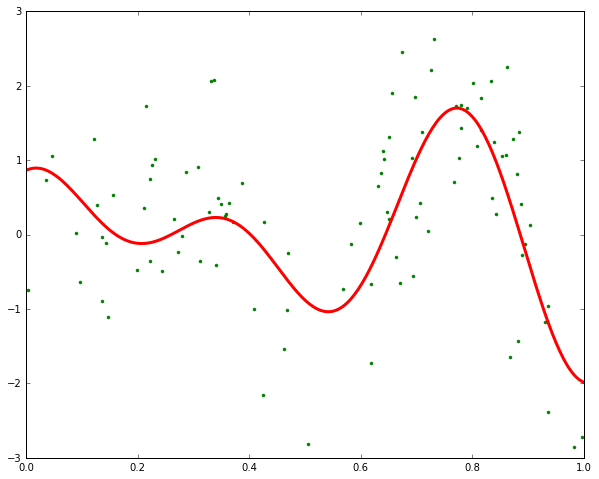

In [218]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the x values: uniform from [0,1].
n = 100
x = np.random.random(n)

# the function that we will attempt to reconstruct:
def f(x):
    return np.sin(11*x)+np.sin(15*x+2.1)

# generate y values
y = f(x) + np.random.randn(n)

# show the data
plt.figure(figsize=(10,8))
xs = np.linspace(0,1,300)
plt.plot(x, y, 'g.')
plt.plot(xs, f(xs), 'r', LineWidth=3)
plt.xlim(0,1)
plt.show()


Our piecewise linear model will consist of $k$ line segments that have start/end points at $x$ coordinates $0, d, 2d, 3d, \ldots, 1$, where $d=1/k$.

To write $y$ as a linear combination of coefficients and input variables, we need to introduce a number of dummy input variables in the same way that we did in the polynomial regression. Recall that in that case, we replaced each $x$ value by a row vector $(x^0, x^1, x^2, \ldots, x^k)$, where $k$ was the degree of polynomial we used. (In the code, the entry $x^0$, called the *intercept*, was omitted because it's supplied by default by sklearn's linear model implementation.)

In this case, we do the same except we introduce *different* dummy variables $(x^{[1]}, x^{[2]}, \ldots, x^{[k]})$, that we define as follows:

$$
x^{[j]} = \begin{cases}
0&\text{if $x<d\cdot (j-1)$},\\
1&\text{if $x\ge d\cdot j$, and}\\
\frac{x-d\cdot(j-1)}{d}&\text{otherwise.}
\end{cases}
$$

So in words, the $j$th dummy variable is 0 if $x$ is to the left of the $j$th bin, it is $1$ if $x$ is to the right of the $j$th bin, and otherwise it measures the position of $x$ in the bin as a number that runs from 0 to 1.

The model can now be described as a linear combination of these variables:

$$
y = \beta_0+\beta_1 x^{[1]}+\beta_2 x^{[2]}+\ldots+\beta_k x^{[k]}.
$$

Like in polynomial regression, we will be able to learn the coefficients $\beta_0, \beta_1,\ldots,\beta_k$ that minimize the squared prediction error using linear regression.

- (12) Write a function `make_dummies(x,k)` that creates a list of the dummy variables $x^{[1]}, x^{[2]}, \ldots, x^{[k]}$ for a given real number $x$ (with $0\le x<1$). Test it by checking that `make_dummies(0.23,10)` yields the list `[1,1,0.3,0,0,0,0,0,0,0]`.

**Note:** *If you have trouble writing the function, then simply use the incorrect code as provided. It will yield ordinary rather than piecewise linear regression, but that doesn't affect your grade.*

In [219]:
# ANSWER

# in:  a scalar x and the number of segments k
# out: a list of k values for the dummy variables x^[1], ..., x^[k]
def make_dummies(x, k):
    if x==1:
        return [1]*k
    b = int(x*k)
    return [1]*b + [k*(x-b/k)] + [0]*(k-b-1)

make_dummies(0.23,10)

[1, 1, 0.3, 0, 0, 0, 0, 0, 0, 0]

The next step is to create the *design matrix*, which collects all the rows of dummy variables for the given data.

For example, given a vector $x = \pmatrix{0.23\\0.81\\0.39}$, if $k=10$, the design matrix $X$ would look like this:

$$X=\pmatrix{%
  1&1&0.3&0&0&0&0&0&0&0\\
  1&1&1&1&1&1&1&1&0.1&0\\
  1&1&1&0.9&0&0&0&0&0&0\\
  }$$
  
So the design matrix $X$ is an $n$ by $k$ matrix of which row $i$ contains the dummy variables for $x_i$.

- (8) Write a function `make_design(x, k)` that creates a `numpy` ndarray `X` containing the design matrix. Test it on the example vector given above.

In [220]:
# ANSWER

# in: a vector x (as a Python list) and the number of segments k
# out: a numpy ndarray containing the design matrix
def make_design(x, k):
    X = np.empty([len(x), k])
    for i in range(len(x)):
        X[i,:] = make_dummies(x[i], k)
    return X

make_design([0.23,0.81,0.39], 10)

array([[ 1. ,  1. ,  0.3,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  0.1,  0. ],
       [ 1. ,  1. ,  1. ,  0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])

Finally, we will use `sklearn` to fit a model to our data, and `pyplot` to display the results!

- (4) Import `linear_model` from `sklearn` and fit it with the design matrix `X` you constructed above, together with the response variables `y`.

In [221]:
# ANSWER

from sklearn import linear_model
k = 10
model = linear_model.LinearRegression()
model.fit(make_design(x,k), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- (3) Now we should plot the shape of the piecewise linear model we just fitted. To do so, we will calculate the model's prediction for *all* $x$-coordinates in the vector `xs` that is defined above. Store the predictions in a variable `ys`. (Hint: supply the model's `predict` function with the design matrix for `xs`.)

In [222]:
# ANSWER

ys = model.predict(make_design(xs, k))

- (3) Finally, modify the code below to include the model's predictions `(xs,ys)`.

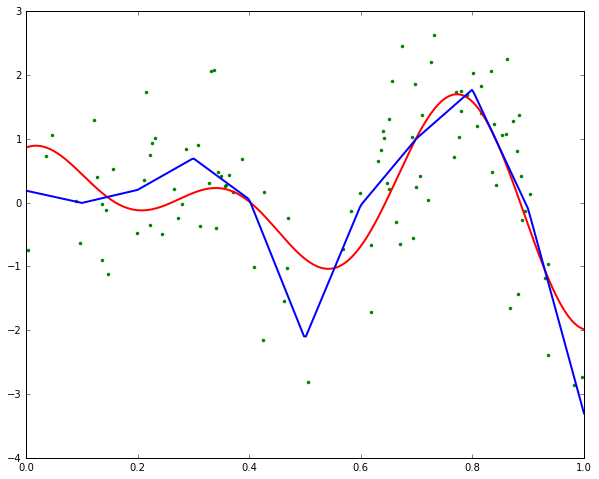

In [223]:
# ANSWER

plt.figure(figsize=(10,8))
plt.plot(x, y, 'g.')
plt.plot(xs, f(xs), 'r', LineWidth=2)
plt.plot(xs, ys, LineWidth=2) # THIS LINE WAS ADDED
plt.xlim(0,1)
plt.show()